## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


b. Use the below cell to find the number of rows in the dataset.

In [4]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [5]:
df["user_id"].nunique()

290584

d. The proportion of users converted.

In [6]:
df[df["converted"] == 1]["converted"].shape[0] / df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
# landing_page == new_page while group != treatment
first = df[(df["landing_page"] == 'new_page') & (df["group"] != 'treatment')].shape[0]

# landing_page != new_page while group == treatment
second = df[(df["landing_page"] != 'new_page') & (df["group"] == 'treatment')].shape[0]

first+second

3893

f. Do any of the rows have missing values?

In [8]:
df.isna().sum(axis=0)

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == True]

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2.shape[0]

290585

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2["user_id"].duplicated(keep=False) == True]["user_id"]

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2["user_id"].duplicated(keep=False) == True]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
# This was a test method - will excecute with a warning of df2 trying to edit df as it's not a copy of df\
# df2.drop_duplicates(subset="user_id", inplace=True)

# Removing the duplicate using index
df2 = df2[df2.index != 2893]

In [15]:
df2.shape[0]

290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
df2["converted"].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
df2[df2["group"] == "control"]["converted"].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
df2[df2["group"] == "treatment"]["converted"].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
# using .mean() will take more time than this method
df2[df2["landing_page"] == "new_page"].shape[0] / df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**> Looking at the results of point d.: We notice that we have equal chances that landing page can be new or old page (50% Chance regardless the group)**

**> Looking at the results of points b. and c.: We notice that the conversion average of both treatment and control pages has very close values (the difference is about 0.001)**

**> Concluding both observations: We don't have enough evidence to say that neither of the new pages lead to more conversions**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer:** If we want to assume that the old page is better unless the new page provoes the opossite, then my null hypotheses would be "the converted mean for the old page is bigger than or equal to that's of the new page (**$p_{old}$** >= **$p_{new}$**)" and the alternative hypotheses would be everything else in the probability which is "the converted mean for the old page is smaller than that's of the new page (**$p_{old}$** < **$p_{new}$**)"

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
p_new = df2["converted"].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old = df2["converted"].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [22]:
df2.loc[(df2["group"] == "treatment") & (df2["landing_page"] == "new_page")].shape[0]

145310

d. What is $n_{old}$?

In [23]:
df2.loc[(df2["group"] == "control") & (df2["landing_page"] == "old_page")].shape[0]

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

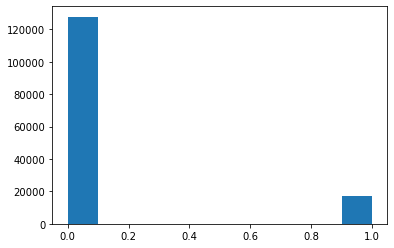

In [24]:
new_page_converted = np.random.choice([0,1], size=145310, p =[1-p_new, p_new])
# Reference plot
plt.hist(new_page_converted);

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

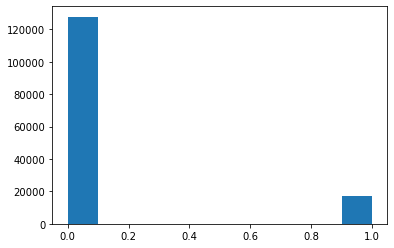

In [25]:
old_page_converted = np.random.choice([0,1], size=145274, p =[1-p_old, p_old])
# Plot should be similair to the first one
plt.hist(old_page_converted);

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
# A more "make sure method"
(new_page_converted.mean() - old_page_converted.mean()).round(3)

-0.0

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [27]:
# Trying with loop
#p_diffs = []
#for _ in range(10000):
#    new_page_converted_sample = np.random.choice([0,1], size=145310, p =[1-p_new, p_new])
#    old_page_converted_sample = np.random.choice([0,1], size=145274, p =[1-p_new, p_new])
#    p_diffs.append(new_page_converted_sample.mean() - old_page_converted_sample.mean())

In [28]:
# another version of the above loop but using list comprehension
# p_diffs = [(np.random.choice([0,1], size=145310, p =[1-p_new, p_new]).mean() - np.random.choice([0,1], size=145274, p =[1-p_new, p_new])).mean() for _ in range(10000)]

In [29]:
# Using numpy binomial method
p_diffs = []
new_converted_simulation = np.random.binomial(145310, p_new, 10000)/145310
old_converted_simulation = np.random.binomial(145274, p_old, 10000)/145274
p_diffs = new_converted_simulation - old_converted_simulation

In [30]:
np.mean(p_diffs).round(3)

-0.0

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [31]:
# We were making a distribution of type 1 error rate of 5%
low, high = np.percentile(p_diffs, 2.5), np.percentile(p_diffs, 97.5)

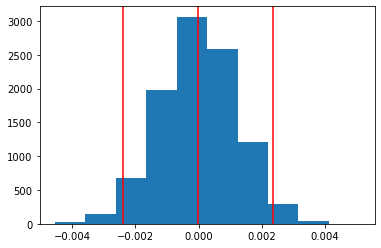

In [32]:
plt.hist(p_diffs);
plt.axvline(np.mean(p_diffs), color='r');
plt.axvline(low, color='r');
plt.axvline(high, color='r');

**Answer:** Yes, that's what i've expected as we are applying central limit theory which will follow a normal distrubution and since the the mean value at point g. was close to 0, then the mean value here should also be close to 0.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
actual_diff = df2[df2["group"] == "treatment"]["converted"].mean() - df2[df2["group"] == "control"]["converted"].mean()
# Converting p_diffs from list to numpy array
(np.array(p_diffs) > actual_diff).mean()

0.9063

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:**
What was computed in point j. is what is called a p-value. p-value is the result obtained from the null hypotheses assuming that the null hypotheses is true. The larger is the p-value (the closer the value is to 1) the stronger is the chance/the more evidence we have to prove that the null hypotheses is true.

In our case, we can clearly see that the mean value is very close to 1 (0.9063) which is a strong evidence to say that the old page is making better than the new page. We can also be more sure if we checked the alternative hypotheses value

In [34]:
# alternative hypotheses
# can be also calculated using 1 - 0.9061
(np.array(p_diffs) <= actual_diff).mean()

0.0937

As expected the value is very close to 0 (0.0937) and bigger than out 5% threshold, So we failed to reject our null hypotheses.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [35]:
import statsmodels.api as sm

convert_old = df2.loc[(df2["group"] == "control") & (df2["converted"] == 1)].shape[0]
convert_new = df2.loc[(df2["converted"] == 1) & (df2["group"] == "treatment")].shape[0]
n_old = df2.loc[(df2["group"] == "control")].shape[0]
n_new = df2.loc[(df2["group"] == "treatment")].shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [36]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative="smaller")
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**1st Question Answer:**

Since the distribute of p_diffs is close to normal distrubution, we can use what is called a z-test to determine whether two population means are different when the variances are known and the sample size is large (we have +10,000 records)

z-score is the number representing how many standard deviations above or below the mean population a score derived from a z-test is. In our case, the z-score has a positive value which indicates that the result lies on the right half of the distrubution. (investopedia.com)

**2nd Question Answer:**<br/>
Yes, The p-value result is very close to what we have computed in points j. and k..

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:**
> Since we are dealing with categorical variables in the dataset, i will be using Logistic regression.<br/>
> Also since we are dealing with 2 categories (old page and new page) then it's better to use binary classification

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
# Add intercept column
df2["intercept"] = 1

# Add dummy variable for group
# i choosed "treatment" column after testing the output of (pd.get_dummies(df["group"]))
df2["ab_page"] = pd.get_dummies(df["group"])["treatment"]

In [38]:
df2.head(5)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [39]:
log_model = sm.Logit(df2["converted"], df2[["intercept", "ab_page"]])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [40]:
res = log_model.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 01 Nov 2020   Pseudo R-squ.:               8.077e-06
Time:                        01:23:04   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer:**

> p_value associated with ab_page is 0.19<br/><br/>
> It differs from the value obtained in **Part II** because the null hypotheses in **Part II** assumed that the old page (control) is better than the new page (treatment) while in this regression model (Part III) we assumed that both have same conversion rate. In other words, Part II was asking about the which has more conversion rate while Part III was asking about the conversion difference betwenn both page.
>> H0: pnew−pold=0<br/>
>> H1: pnew−pold≠0<br/>

> In our case we failed to reject the null hypothesis and we can say that both pages have same rate of conversions

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**

> It's better to consider other factors into the regression model as it may influence the results of the predictions giving us a clearer view how we are going to decide which page is better. For example adding the duration of time a user spent on the page gives us an overview about whether he is interested in exploring the new page or the old page. Another example is the clicks per unique visits which also give a more detailed information about whether the design of the page is more user-freindly and allows him to access other parts of the site. These examples will be crucial to get a more definite decesion about which page is better than the other.<br/><br/>

> The disadvantages of adding such terms into the regression model are as follows:<br/>
>> 1) more factors means more complex computations as each factor can affect other variables<br/>(y = a + b(x1) + c(x2)) => (y = a\` + b\`(x1) + c\`(x2) + d(x3))
>>
>> 2) There is a chance that one can add a factor that doesn't affect the regression or the results

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [41]:
# Read countries.csv and join it with our cleaned dataset *df2* into a new dataset *df_new*
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [42]:
# Checking listed countries
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [43]:
### Create the necessary dummy variables
cntry_dumy = pd.get_dummies(df_new["country"])
df_new = df_new.join(cntry_dumy, how="right")
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [44]:
### Fit Your Linear Model And Obtain the relationship results between country and conversion rate
linear_model = sm.Logit(df_new["converted"], df_new[["intercept", "UK", "US"]]) # Taking "CA" as baseline
res = linear_model.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 01 Nov 2020   Pseudo R-squ.:               1.521e-05
Time:                        01:23:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

In [45]:
# Convert logistic result into quantitative results
np.exp(0.0053), np.exp(0.0042)

(1.0053140698457452, 1.0042088323609764)

> Looking at the coef of both "UK" & "US" whose reults are very close to each other, we can say that there is a weak relationship between country and conversion

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [46]:
# Adding the necessary columns
df_new["ab_UK"] = df_new["ab_page"] * df_new["UK"]
df_new["ab_US"] = df_new["ab_page"] * df_new["US"]

In [47]:
linear_model = sm.Logit(df_new["converted"], df_new[["intercept", "ab_page", "UK", "US", "ab_UK", "ab_US"]]) # Taking "CA" as baseline
res = linear_model.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 01 Nov 2020   Pseudo R-squ.:               3.482e-05
Time:                        01:23:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
ab_UK          0.0783      0.057      1.378      0.168      -0.033       0.190
ab_US          0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

> noticing the p-value is almost still the same value (0.005 difference), we are now definite that the country doesn't have a noticable influence on page conversion.

<a id='conclusions'></a>
## Conclusions

within this project, we tried to make a decision of whether should a company implement its new page or not. We made 3 different approaches.<br/>
> 1) Probability Approach<br/>
> 2) A/B Test Approach<br/>
> 3) Regression Approach<br/>

### 1) Probability Approach

we loaded in the data and began exploring and cleaning it, then saving the cleaned data into a dataset **df2**.<br/>
we did include some results from exploring like:
> 1) There is a almost a 50% for a user to get any of the landing page (new/old)<br/>
> 2) The average conversion rate for both treatment and control pages are very close

### 2) A/B Test Approach

In this part, we detailed on exploring the data and applied the central limit theorem and obtain a normal distribution that helped us decide which of the null/alternative hypothesis was correct with 5% error rate of type 1. We ended up failing to reject the null hypothesis which was:<br/>
> "the converted mean for the old page is bigger than that's of the new page (**$p_{old}$** > **$p_{new}$**)"

We even confirmed this by running the z-test in the statsmodels library which computed the z-score and p-value, and the p-value obtained was very close to the p-value computed before.

**Downsides:**
> 1) The dataset shows the data was collected on a period of 21 days which is a very short period to run an A/B test.<br/>
> 2) Due to Change aversion effect, a group of users may give an unfair advantage to the older page and same to the newer page due to Novelty effect.

### 3) Regression Approach

Finally, we used some supervised machine learning algorithms (Regression) to perform some more deep analysis. Using Logistic regression, we obtained a small p-value to made us fail to reject our null hypothesis which was:<br/>
> Both pages have same conversion rate

Then we checked wether there was a relationship between individuals being from specific country ("US", "CA", "UK") and the page conversion rate and that was done using Linear regression. The obtained results was that there was a very weak relationship that almost can be neglected between both factors. (countries does not have an impact on conversion rate)